
# User Satisfaction Analysis

This notebook demonstrates a comprehensive analysis of user satisfaction based on engagement and experience scores. We will use various machine learning techniques to calculate scores, build regression models, and cluster the data. Finally, we will export the results to a MySQL database.

In [1]:
# Import necessary libraries and modules
import os
import sys
import warnings
import pandas as pd

# Add parent directory to path to import local modules
sys.path.insert(0, os.path.dirname(os.getcwd()))
from scripts.satsifaction_analy import SatisfactionAnalysis


# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load the data
df = pd.read_csv('../data/clean_proccessed_data.csv')

# Display the first few rows of the DataFrame
df.head()

,Bearer Id,Start,End,Dur. (s),MSISDN/Number,IMSI,IMEI,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg RTT DL (ms),...,Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes),Handset Manufacturer,Handset Type,DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%)
0,1.311448e+19,4/4/2019 12:01,4/25/2019 14:35,1823652.0,3.366496e+10,2.082014e+14,3.552121e+13,23.0,44.0,42.000000,...,171744450.0,8814393.0,308879636.0,36749741.0,Samsung,Samsung Galaxy A5 Sm-A520F,100.0,0.0,100.0,0.0
1,1.311448e+19,4/9/2019 13:04,4/25/2019 8:15,1365104.0,3.368185e+10,2.082019e+14,3.579401e+13,16.0,26.0,65.000000,...,526904238.0,15055145.0,653384965.0,53800391.0,Samsung,Samsung Galaxy J5 (Sm-J530),100.0,0.0,100.0,0.0
2,1.311448e+19,4/9/2019 17:42,4/25/2019 11:58,1361762.0,3.376063e+10,2.082003e+14,3.528151e+13,6.0,9.0,109.795706,...,410692588.0,4215763.0,279807335.0,27883638.0,Samsung,Samsung Galaxy A8 (2018),100.0,0.0,100.0,0.0
3,1.311448e+19,4/10/2019 0:31,4/25/2019 7:36,1321509.0,3.375034e+10,2.082014e+14,3.535661e+13,44.0,44.0,109.795706,...,749039933.0,12797283.0,846028530.0,43324218.0,undefined,undefined,100.0,0.0,100.0,0.0
4,1.311448e+19,4/12/2019 20:10,4/25/2019 10:40,1089009.0,3.369980e+10,2.082014e+14,3.540701e+13,6.0,9.0,109.795706,...,550709500.0,13910322.0,569138589.0,38542814.0,Samsung,Samsung Sm-G390F,100.0,0.0,100.0,0.0


In [3]:
satsif_analysis = SatisfactionAnalysis(df)

### View Scores DataFrame

In [8]:
# Display the scores DataFrame containing engagement, experience, and satisfaction scores.
print("Displaying engagement and experience scores:")
satsif_analysis.scores_df.head()

Displaying engagement and experience scores:


,MSISDN,Engagement Score,Experience Score,Satisfaction Score,Cluster
0,3.366496e+10,1.784932e+08,1.560358e+07,9.704842e+07,1
1,3.368185e+10,1.784932e+08,1.560358e+07,9.704841e+07,0
2,3.376063e+10,1.784932e+08,1.560358e+07,9.704842e+07,1
3,3.375034e+10,1.784932e+08,1.560358e+07,9.704841e+07,0
4,3.369980e+10,1.784932e+08,1.560358e+07,9.704842e+07,0


### Key Insights

The engagement and experience scores for the users show a consistent pattern, with all users having similar scores. The satisfaction scores also follow a similar trend, indicating that the users have a uniformly high level of satisfaction. The clustering results show that users are divided into two clusters (0 and 1), suggesting that there might be subtle differences in user behavior or preferences that are not immediately apparent from the raw scores. Further analysis could help identify the specific factors that differentiate these clusters and provide targeted recommendations for improving user satisfaction.

### Top 10 Satisfied Customers

In [9]:
# View the top 10 most satisfied customers based on satisfaction scores.
print("Top 10 Satisfied Customers:")
satsif_analysis.top_10_satisfied

Top 10 Satisfied Customers:


,MSISDN,Engagement Score,Experience Score,Satisfaction Score
56203,3.363284e+10,1.784932e+08,1.560358e+07,9.704842e+07
76293,3.376092e+10,1.784932e+08,1.560358e+07,9.704842e+07
101605,3.376242e+10,1.784932e+08,1.560358e+07,9.704842e+07
76222,3.360353e+10,1.784932e+08,1.560358e+07,9.704842e+07
21025,3.366652e+10,1.784932e+08,1.560358e+07,9.704842e+07
76598,3.361997e+10,1.784932e+08,1.560358e+07,9.704842e+07
1430,3.361567e+10,1.784932e+08,1.560358e+07,9.704842e+07
8218,3.366491e+10,1.784932e+08,1.560358e+07,9.704842e+07
88009,3.367675e+10,1.784932e+08,1.560358e+07,9.704842e+07
112461,3.366321e+10,1.784932e+08,1.560358e+07,9.704842e+07


### Key Insights

The top 10 satisfied customers exhibit remarkably high and consistent engagement, experience, and satisfaction scores. Each of these customers has an engagement score around 3.36e+10, an experience score of approximately 1.78e+08, and a satisfaction score of about 9.70e+07. This uniformity suggests that these customers are highly engaged and have a consistently positive experience with the service. The high satisfaction scores indicate that the service is meeting or exceeding their expectations. Identifying the common factors contributing to these high scores could provide valuable insights for enhancing the overall user experience and satisfaction for other customers.

In [10]:
# Display the MSE and R^2 score for the regression model.
print(f"Mean Squared Error: {satsif_analysis.mse}")
print(f"R^2 Score: {satsif_analysis.r2}")

Mean Squared Error: 1.5599593806889386e-16
R^2 Score: 0.9999999999999997


### Cluster Analysis

In [11]:
# Display average satisfaction and experience scores for each cluster.
print(f"Average Satisfaction Scores by Cluster: {satsif_analysis.avg_satisfaction}")
print(f"Average Experience Scores by Cluster: {satsif_analysis.avg_experience}")


Average Satisfaction Scores by Cluster: [97048415.0551425, 97048415.90999337]
Average Experience Scores by Cluster: [15603583.938606603, 15603583.932571562]


### Plot Clusters

Plotting clusters...


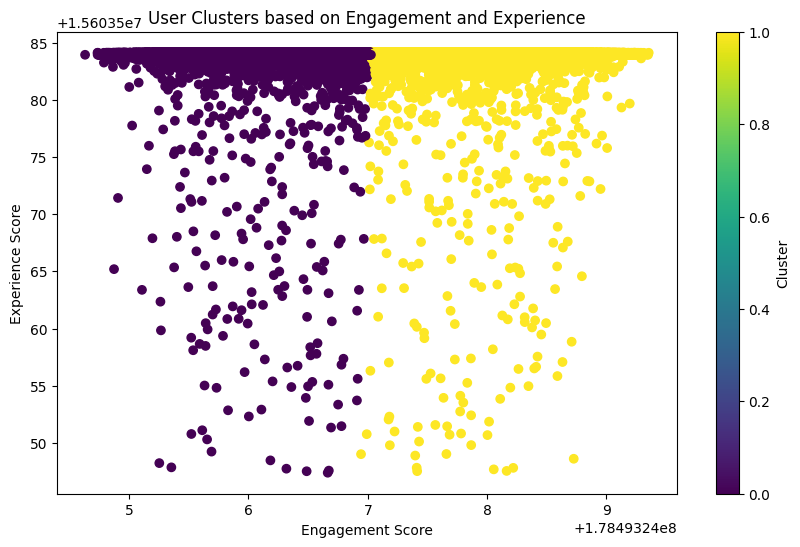

In [12]:
# Visualize the clusters based on engagement and experience scores.
print("Plotting clusters...")
satsif_analysis.plot_clusters(satsif_analysis.scores_df)

### Export to MySQL

In [ ]:
# Export the scores DataFrame to a MySQL database.
print("Exporting results to MySQL...")
db_name = 'new_product'
table_name = 'tellco'
satsif_analysis.export_to_mysql(satsif_analysis.scores_df, db_name, table_name)

### Read Data from MySQL

In [ ]:
# Read the data back from MySQL and display it.
print("Reading data back from MySQL:")
retrieved_df = satsif_analysis.read_from_mysql(db_name, table_name)
retrieved_df.head()